# Neural Nets

In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams["figure.facecolor"] = 'green'

In [20]:
train = pd.read_csv('../Base de Datos/trainset-sin-id.csv')
test = pd.read_csv('../Base de Datos/testset-sin-id.csv')
train = train.drop(['t_mode', 'id'], axis = 1)
test = test.drop(['t_mode', 'id'], axis = 1)

In [21]:
train = train.drop(train[train['popularity'] > 60].index)
test = test.drop(test[test['popularity'] > 60].index)


In [22]:
print(train.shape)
print(test.shape)

(51826, 12)
(12994, 12)


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Suppor

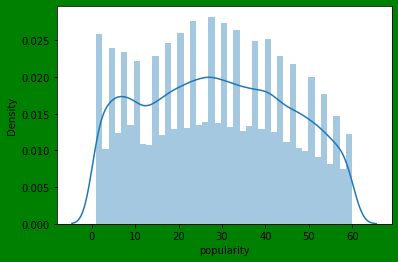

In [23]:
fig = plt.figure()
sns.distplot(train['popularity'])

We will use PCA to reduce the dimensionality of the datasets

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca.fit(train)
print(pca.explained_variance_ratio_)
train_reduced = pca.transform(train)

[0.74810959 0.23381682 0.01423163 0.00340077]


In [25]:
train_reduced.shape

(51826, 4)

In [26]:
print(train.shape, test.shape)

(51826, 12) (12994, 12)


Generate X_train, X_test, y_train, y_test

In [27]:
X_train = train.drop(['popularity', 'ClasePopularidad'], axis = 1)
y_train = train['popularity']
X_test = test.drop(['popularity', 'ClasePopularidad'], axis = 1)
y_test = test['popularity']


In [28]:
y_test

0        56.0
1        22.0
2        22.0
3        50.0
4        35.0
         ... 
13915    38.0
13916    13.0
13917    37.0
13918    28.0
13919    54.0
Name: popularity, Length: 12994, dtype: float64

Generate X_train_scaled, X_test_scaled.
To do that we will import Standard Scaler from sklearn.preprocessing

In [29]:
from sklearn.preprocessing import StandardScaler
# Instantiate the Object
scaler = StandardScaler()
# Fit the object to the train dataset
scaler.fit(X_train)
# Transform the train and test dataset (note we do not fit to the test in order to prevent leakage)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

## Initialize the Neural Net
We are going to use a Multi-Layer-Perceptron here, to check out how it performs. I suspect it will probably do better than earlier methods

In [31]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

Initialize a neural net object that has 2 16 neuron hidden layers

In [32]:
neural_net = MLPRegressor(max_iter = 300, activation = 'relu', hidden_layer_sizes = (16, 10, 12), solver = 'adam', random_state = 42, tol = 0.00005, verbose = True)

In [37]:
neural_net.fit(X_train_scaled_pca, y_train)

Iteration 1, loss = 324.01377275
Iteration 2, loss = 142.27914076
Iteration 3, loss = 134.30223148
Iteration 4, loss = 130.63032426
Iteration 5, loss = 129.16358061
Iteration 6, loss = 128.55321906
Iteration 7, loss = 128.34632826
Iteration 8, loss = 128.16097982
Iteration 9, loss = 128.06843232
Iteration 10, loss = 127.96716663
Iteration 11, loss = 127.87301699
Iteration 12, loss = 127.79772688
Iteration 13, loss = 127.60755427
Iteration 14, loss = 127.53563956
Iteration 15, loss = 127.40118005
Iteration 16, loss = 127.38367001
Iteration 17, loss = 127.26370817
Iteration 18, loss = 127.20629308
Iteration 19, loss = 127.21072917
Iteration 20, loss = 127.09931215
Iteration 21, loss = 127.11570655
Iteration 22, loss = 127.01849526
Iteration 23, loss = 126.99420354
Iteration 24, loss = 127.00080729
Iteration 25, loss = 126.90809107
Iteration 26, loss = 126.92736664
Iteration 27, loss = 126.85606110
Iteration 28, loss = 126.89211773
Iteration 29, loss = 126.81702829
Iteration 30, loss = 12

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(16, 10, 12), learning_rate='constant',
             learning_rate_init=0.001, max_iter=300, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=5e-05,
             validation_fraction=0.1, verbose=True, warm_start=False)

In [38]:
y_pred = neural_net.predict(X_test_scaled_pca)
y_pred = pd.DataFrame(y_pred, index = y_test.index)
y_test = pd.DataFrame(y_test)
diff = pd.concat([y_pred ,y_test], axis = 1)
diff = diff.rename(columns = {0 : 'y_pred', 'popularity' : 'y_test' })
diff

,y_pred,y_test
0,30.579959,56.0
1,29.693371,22.0
2,32.002675,22.0
3,30.866129,50.0
4,31.227790,35.0
...,...,...
13915,29.654579,38.0
13916,24.031937,13.0
13917,24.195735,37.0
13918,29.552902,28.0


In [39]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(diff['y_test'], diff['y_pred'])
r_squared = r2_score(diff['y_test'], diff['y_pred'])
print(f'El mse es : {mse} y el r2 es : {r_squared}')

El mse es : 255.89100674148165 y el r2 es : 0.040302056308532674


In [33]:
neural_net.fit(X_train_scaled, y_train)

Iteration 1, loss = 314.64135448
Iteration 2, loss = 137.29392796
Iteration 3, loss = 132.72951718
Iteration 4, loss = 130.32806825
Iteration 5, loss = 128.84233110
Iteration 6, loss = 127.74184492
Iteration 7, loss = 126.95311098
Iteration 8, loss = 126.33790405
Iteration 9, loss = 125.83762033
Iteration 10, loss = 125.39239811
Iteration 11, loss = 125.04434628
Iteration 12, loss = 124.60963985
Iteration 13, loss = 124.41985845
Iteration 14, loss = 124.10605669
Iteration 15, loss = 123.86210710
Iteration 16, loss = 123.73990224
Iteration 17, loss = 123.59760800
Iteration 18, loss = 123.51475766
Iteration 19, loss = 123.33209723
Iteration 20, loss = 123.25254589
Iteration 21, loss = 123.16326160
Iteration 22, loss = 123.05064053
Iteration 23, loss = 122.95698498
Iteration 24, loss = 122.88474446
Iteration 25, loss = 122.81471865
Iteration 26, loss = 122.81124254
Iteration 27, loss = 122.64886161
Iteration 28, loss = 122.66768848
Iteration 29, loss = 122.57739355
Iteration 30, loss = 12

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(16, 10, 12), learning_rate='constant',
             learning_rate_init=0.001, max_iter=300, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=5e-05,
             validation_fraction=0.1, verbose=True, warm_start=False)

In [34]:
y_pred = neural_net.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred, index = y_test.index)
y_test = pd.DataFrame(y_test)
diff = pd.concat([y_pred ,y_test], axis = 1)
diff = diff.rename(columns = {0 : 'y_pred', 'popularity' : 'y_test' })
diff

,y_pred,y_test
0,27.229310,56.0
1,18.452741,22.0
2,32.256980,22.0
3,32.861206,50.0
4,32.107890,35.0
...,...,...
13915,28.756955,38.0
13916,21.681878,13.0
13917,24.673371,37.0
13918,25.451575,28.0


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Suppor

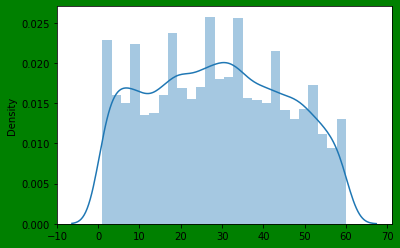

In [35]:
fig = plt.figure()
sns.distplot(y_test)

Analyze how well did the model do

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(diff['y_test'], diff['y_pred'])
r_squared = r2_score(diff['y_test'], diff['y_pred'])
print(f'El mse es : {mse} y el r2 es : {r_squared}')

El mse es : 246.44472350129368 y el r2 es : 0.07572955615144117
